Our objective: Find a suitable set of weights and biases using the training data, to make accurate predictions.


The training data can be represented using 2 matrices (inputs and targets), each with one row per observation and one column for variable.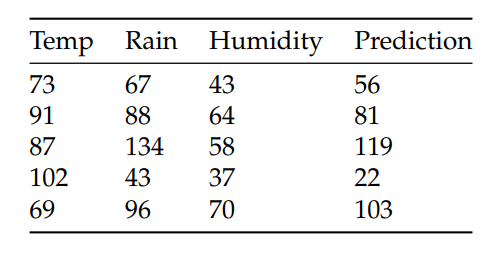

In [ ]:
# Import Numpy & PyTorch
import numpy as np
import torch

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],
[102, 43, 37],
[69, 96, 70]], dtype='float32')


In [ ]:
# Target (apples)
targets = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')


In [ ]:
# Convert inputs and targets to tensors
# Imports
import torch

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


In [ ]:
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [ ]:
# Weights and biases
w = torch.randn(1,3,requires_grad =True)
print(w)
b = torch.randn(1,requires_grad=True)
print(b)

tensor([[-1.1522,  1.1695,  0.5354]], requires_grad=True)
tensor([0.5385], requires_grad=True)


In [ ]:
def model(x):
  return torch.mm(x,w.t(),out=None) +b

In [ ]:
# Generate predictions
# Compare with targets

preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)

Prediction : tensor([[ 17.8072],
        [ 32.8706],
        [ 88.0622],
        [-46.8851],
        [ 70.7863]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [ ]:
# MSE Loss
def mseLoss(prediction, target):

  difference = 0
  cnt = 0
  sum = 0
  n = len(target)
  for i in range(0,n):
    cnt += 1;
    difference = target[i] - prediction[i]
    sqr = difference * difference
    sum += sqr
  mean = sum/cnt
  return mean


In [ ]:
# Compute loss
output = mseLoss(preds,targets)
print("Loss: ",output)

Loss:  tensor([2103.0310], grad_fn=<DivBackward0>)


In [ ]:
# Compute gradients
print("Gradient :",output.backward())

Gradient : None


In [ ]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-1.1522,  1.1695,  0.5354]], requires_grad=True)
tensor([[-7643.3857, -6797.8188, -4528.2690]])


In [ ]:
# Gradients for bias
print(b)
print(b.grad)

tensor([0.5385], requires_grad=True)
tensor([-87.3435])


In [ ]:
# Compute gradients
with torch.no_grad():
  w-=w.grad*1e-5
  b-=b.grad*1e-5
  w.grad.zero_()
  b.grad.zero_()
print(w)
print(b)

tensor([[-1.0757,  1.2374,  0.5807]], requires_grad=True)
tensor([0.5394], requires_grad=True)


In [ ]:
# Generate predictions
# Calculate the loss
new_preds = model(inputs)
new_loss = mseLoss(new_preds,targets)
print("New Loss :",new_loss)

New Loss : tensor([1074.1042], grad_fn=<DivBackward0>)


In [ ]:
# Train for 100 epochs
for i in range(100):
  preds = model(inputs)
  loss = mseLoss(preds,targets)
  loss.backward()
  with torch.no_grad():
    w-=w.grad * 1e-5
    b-=b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
# Calculate loss
preds = model(inputs)
loss = mseLoss(preds,targets)
print(loss)

tensor([29.4609], grad_fn=<DivBackward0>)


In [ ]:
import torch.nn as nn
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [ ]:
def model1(x):
  return x @ w.t() +b

In [ ]:
preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)

Prediction : tensor([[ 55.6593],
        [ 80.3773],
        [125.2767],
        [ 11.7193],
        [104.3081]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [ ]:
loss = nn.MSELoss()
output = loss(preds,targets)
output.backward()
print("Loss :",output)

Loss : tensor(29.4609, grad_fn=<MseLossBackward0>)


In [ ]:
print(w)
print(w.grad)
print(b)
print(b.grad)

tensor([[-0.5470,  1.0113,  0.6346]], requires_grad=True)
tensor([[-197.5340,  178.7847,    8.2909]])
tensor([0.5438], requires_grad=True)
tensor([-1.4637])


In [ ]:
for i in range(100):
    preds = model(inputs)
    loss = mseLoss(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [ ]:
preds = model1(inputs)
loss = mseLoss(preds,targets)
 
print(loss)

tensor([3.4632], grad_fn=<DivBackward0>)


#4_1

In [ ]:
 # Import Numpy & PyTorch
import numpy as np
import torch

In [ ]:
# Imports
import torch.nn as nn

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37],[69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69,96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96,70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
[56, 70], [81, 101], [119, 133], [22, 37], [103, 119]],dtype='float32')


In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
 # Define dataset
train_ds = TensorDataset(inputs,targets)

In [ ]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 87., 134.,  58.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.]]), tensor([[119., 133.],
         [ 56.,  70.],
         [119., 133.],
         [ 56.,  70.],
         [119., 133.]])]

In [ ]:
# Define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.2951, -0.3089, -0.5220],
        [ 0.0849,  0.2601, -0.0429]], requires_grad=True)
Parameter containing:
tensor([-0.1732, -0.5349], requires_grad=True)


In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
# Define loss function
import torch.nn.functional as F
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(9472.3896, grad_fn=<MseLossBackward0>)


In [ ]:
#definr utility function to train the model
def fit(num_epochs,model,loss_fn,opt):
  for epochs in range(num_epochs):
    for xb,yb in train_dl:
      #generate prediction
      pred = model(xb)
      loss = loss_fn(pred, yb)
      #perform gradient descent
      loss.backward()
      opt.step()
      opt.zero_grad()
  print('Training loss: ', loss_fn(model(inputs), targets))
# Train the model for 100 epochs
fit(100, model, loss_fn, opt)


Training loss:  tensor(50.7941, grad_fn=<MseLossBackward0>)


In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 59.3352,  71.5666],
        [ 79.2598,  97.5133],
        [122.5754, 138.4870],
        [ 32.8869,  44.1442],
        [ 89.8217, 109.3535],
        [ 59.3352,  71.5666],
        [ 79.2598,  97.5133],
        [122.5754, 138.4870],
        [ 32.8869,  44.1442],
        [ 89.8217, 109.3535],
        [ 59.3352,  71.5666],
        [ 79.2598,  97.5133],
        [122.5754, 138.4870],
        [ 32.8869,  44.1442],
        [ 89.8217, 109.3535]], grad_fn=<AddmmBackward0>)

In [ ]:
# Compare with targets
print(targets)


tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


#Exercise 1 

Try Linear Regression just using numpy (Without Tensorflow/Pytorch or other torch
library). You can optionally use sklearn (if you want).

In [ ]:
import numpy as np
import torch
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,43,37],
                   [69,96,70]],dtype='float32')
targets = np.array([[56],
                    [81],
                    [119],
                    [22],
                    [103]],dtype='float32')
 # Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
print(inputs)
targets = torch.from_numpy(targets)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [ ]:
# Weights and biases
w = torch.randn(1,3,requires_grad =True)
print(w)
b = torch.randn(1,requires_grad=True)
print(b)
# Define the model
def model(x):
  return torch.mm(x,w.t(),out=None) +b
# Generate predictions
# Compare with targets

preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)
# MSE loss
# Compute loss
def mse(P,T):
  diff = 0
  i=0
  sum=0
  n=len(T)
  for k in range(0,n):
    i+=1
    diff = T[k] - P[k]
    square = diff*diff
    sum+=square
  mean = sum/i
  return mean

output = mse(preds,targets)
print("Loss :",output)
# Compute gradients
print("Gradient :",output.backward())
# Gradients for weights
print(w)
print(w.grad)
# Gradients for bias
print(b)
print(b.grad)
# Compute gradients
with torch.no_grad():
  w-=w.grad*1e-5
  b-=b.grad*1e-5
  w.grad.zero_()
  b.grad.zero_()
print(w)
print(b)
# Generate predictions
# Calculate the loss
new_preds = model(inputs)
new_loss = mse(new_preds,targets)
print("New Loss :",new_loss)
# Train for 100 epochs
for i in range(100):
  preds = model(inputs)
  loss = mse(preds,targets)
  loss.backward()
  with torch.no_grad():
    w-=w.grad * 1e-5
    b-=b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
# Calculate loss
preds = model(inputs)
loss = mse(preds,targets)
print(loss)

tensor([[ 1.0235, -0.9169, -0.2533]], requires_grad=True)
tensor([0.8187], requires_grad=True)
Prediction : tensor([[  3.2095],
        [ -2.9418],
        [-47.6943],
        [ 56.4169],
        [-34.3139]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])
Loss : tensor([11531.9355], grad_fn=<DivBackward0>)
Gradient : None
tensor([[ 1.0235, -0.9169, -0.2533]], requires_grad=True)
tensor([[-12783.5781, -17985.2344, -10259.6338]])
tensor([0.8187], requires_grad=True)
tensor([-162.5294])
tensor([[ 1.1513, -0.7371, -0.1507]], requires_grad=True)
tensor([0.8203], requires_grad=True)
New Loss : tensor([6656.0283], grad_fn=<DivBackward0>)
tensor([274.5432], grad_fn=<DivBackward0>)


#Exercise 2:

Try Linear regression on same prediction data using Tensorflow.

In [ ]:
 # Imports
import torch.nn as nn
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])


In [ ]:
def model1(x):
  return x @ w.t() +b
preds = model(inputs)
print("Prediction :",preds)
print("Targets :",targets)
loss = nn.MSELoss()
output = loss(preds,targets)
output.backward()
print("Loss :",output)
print(w)
print(w.grad)
print(b)
print(b.grad)
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
preds = model1(inputs)
loss = mse(preds,targets)
 
print(loss)

Prediction : tensor([[ 62.6619],
        [ 83.0023],
        [108.0497],
        [ 51.9432],
        [ 85.4552]], grad_fn=<AddBackward0>)
Targets : tensor([[ 56.],
        [ 81.],
        [119.],
        [ 22.],
        [103.]])
Loss : tensor(274.5432, grad_fn=<MseLossBackward0>)
tensor([[0.1672, 0.5898, 0.2355]], requires_grad=True)
tensor([[ 623.7879, -496.6127, -136.2982]])
tensor([0.8149], requires_grad=True)
tensor([4.0449])
tensor([32.7417], grad_fn=<DivBackward0>)


que 1

In [ ]:
import numpy as np
import torch

# Single feature
input = np.array([73,91,87,102,69])
target = np.array([56,81,119,22,103])
weight = np.array([12,21,18,32,25])
bias = np.array([1,1,1,1,1])

prediction = (input * weight) + bias

print(prediction)

MSE = np.square(np.subtract(target, prediction)).mean()
MSE

[ 877 1912 1567 3265 1726]


3854896.8

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

input = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')

target = np.array([[56], [81], [119], [22], [103] ], dtype='float32')

inputs = torch.from_numpy(input)
targets = torch.from_numpy(target)

dataset = TensorDataset(inputs, targets)

# To divide dataset into the batches
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# torch,randn generates random value matrix such that mean = 0 and variance = 1

# 1x3 random value matrix
weight = torch.randn(1,3, requires_grad=True)

# # 1x1 random value matrix
biass = torch.rand(1, requires_grad=True)


# w = np.array([0.2590, 0.3474, 0.3161], dtype='float32')
# b = np.array([0.2950], dtype='float32')

# weight = torch.tensor(w, requires_grad=True)
# biass = torch.tensor(b, requires_grad=True)

print("\n\nIntial weights: ", weight)
print("Intail bias:", biass, "\n\n")

def mse_loss_function(prediction, target):
  difference = prediction - target
  difference_square = difference * difference
  return torch.sum(difference_square) /difference.numel() 



def model(X):
  return X @ weight.T + biass # input matrix and weight matrix multiplication and add bias

for x, y in train_loader:
  prediction = model(x)

  print("Initial Prediction: ", prediction)
  print("Actual: ", y)

  print("Initial Loss: ", mse_loss_function(prediction, y))

# Training

epochs = 1000

for i in range(epochs):

  for x,y in train_loader:
    preds = model(x)
    loss = mse_loss_function(preds, y)

    loss.backward()

    with torch.no_grad():
      weight -= weight.grad * 1e-5
      biass -= biass.grad * 1e-5

      weight.grad.zero_()
      biass.grad.zero_()


# Final
for x, y in train_loader:
  prediction = model(x)

  print()
  print()

  print("Final Prediction: ", prediction)
  print("Actual: ", y)



  print("Final Loss: ", mse_loss_function(prediction, y))

print("\n\n\n")

# Exercise
pred = model(torch.from_numpy(np.array([70, 34, 45], dtype='float32')))
print(pred) # 31.3134


print("\n\nFinal weights: ", weight)
print("Final bias:", biass, "\n\n")



Intial weights:  tensor([[-0.2688,  1.0783, -0.0519]], requires_grad=True)
Intail bias: tensor([0.5371], requires_grad=True) 


Initial Prediction:  tensor([[ 81.8746],
        [ 50.9299],
        [118.6356],
        [ 67.6460]], grad_fn=<AddBackward0>)
Actual:  tensor([[103.],
        [ 56.],
        [119.],
        [ 81.]])
Initial Loss:  tensor(162.6131, grad_fn=<DivBackward0>)
Initial Prediction:  tensor([[17.5665]], grad_fn=<AddBackward0>)
Actual:  tensor([[22.]])
Initial Loss:  tensor(19.6558, grad_fn=<DivBackward0>)


Final Prediction:  tensor([[119.4500],
        [ 57.6209],
        [ 21.4535],
        [102.2011]], grad_fn=<AddBackward0>)
Actual:  tensor([[119.],
        [ 56.],
        [ 22.],
        [103.]])
Final Loss:  tensor(0.9417, grad_fn=<DivBackward0>)


Final Prediction:  tensor([[82.5238]], grad_fn=<AddBackward0>)
Actual:  tensor([[81.]])
Final Loss:  tensor(2.3219, grad_fn=<DivBackward0>)




tensor([31.9265], grad_fn=<AddBackward0>)


Final weights:  tensor([[-0

Take the learning rate value as 0.1 and train the model. Write in brief the impact of this
learning rate on the model.

In [2]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

input = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')

target = np.array([[56], [81], [119], [22], [103] ], dtype='float32')

inputs = torch.from_numpy(input)
targets = torch.from_numpy(target)

dataset = TensorDataset(inputs, targets)

# To divide dataset into the batches
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# torch,randn generates random value matrix such that mean = 0 and variance = 1

# 1x3 random value matrix
weight = torch.randn(1,3, requires_grad=True)

# 1x1 random value matrix
biass = torch.rand(1, requires_grad=True)

def mse_loss_function(prediction, target):
  difference = prediction - target
  difference_square = difference * difference
  return torch.sum(difference_square) /difference.numel() 



def model(X):
  return X @ weight.T + biass # input matrix and weight matrix multiplication and add bias

for x, y in train_loader:
  prediction = model(x)

  print("Initial Prediction: ", prediction)
  print("Actual: ", y)

  print("Initial Loss: ", mse_loss_function(prediction, y))


# Training

epochs = 1000

for i in range(epochs):

  for x,y in train_loader:
    preds = model(x)
    loss = mse_loss_function(preds, y)

    loss.backward()

    with torch.no_grad():
      weight -= weight.grad * 1e-1
      biass -= biass.grad * 1e-1

      weight.grad.zero_()
      biass.grad.zero_()





# Final
for x, y in train_loader:
  prediction = model(x)

  print()
  print()

  print("Final Prediction: ", prediction)
  print("Actual: ", y)

  print("Final Loss: ", mse_loss_function(prediction, y))

Initial Prediction:  tensor([[117.3020],
        [104.3739],
        [138.8918],
        [114.1812]], grad_fn=<AddBackward0>)
Actual:  tensor([[119.],
        [ 56.],
        [ 22.],
        [103.]])
Initial Loss:  tensor(4032.9080, grad_fn=<DivBackward0>)
Initial Prediction:  tensor([[136.9507]], grad_fn=<AddBackward0>)
Actual:  tensor([[81.]])
Initial Loss:  tensor(3130.4807, grad_fn=<DivBackward0>)


Final Prediction:  tensor([[nan],
        [nan],
        [nan],
        [nan]], grad_fn=<AddBackward0>)
Actual:  tensor([[ 56.],
        [ 81.],
        [103.],
        [119.]])
Final Loss:  tensor(nan, grad_fn=<DivBackward0>)


Final Prediction:  tensor([[nan]], grad_fn=<AddBackward0>)
Actual:  tensor([[22.]])
Final Loss:  tensor(nan, grad_fn=<DivBackward0>)


Use the model to predict crop yield for apples if temperature is 70, Rain is 34 and Humidity
is 45.

In [1]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

input = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')

target = np.array([[56], [81], [119], [22], [103] ], dtype='float32')

inputs = torch.from_numpy(input)
targets = torch.from_numpy(target)

dataset = TensorDataset(inputs, targets)

# To divide dataset into the batches
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# torch,randn generates random value matrix such that mean = 0 and variance = 1

# 1x3 random value matrix
weight = torch.randn(1,3, requires_grad=True)

# 1x1 random value matrix
biass = torch.rand(1, requires_grad=True)

def mse_loss_function(prediction, target):
  difference = prediction - target
  difference_square = difference * difference
  return torch.sum(difference_square) /difference.numel() 



def model(X):
  return X @ weight.T + biass # input matrix and weight matrix multiplication and add bias

for x, y in train_loader:
  prediction = model(x)

  print("Initial Prediction: ", prediction)
  print("Actual: ", y)

  print("Initial Loss: ", mse_loss_function(prediction, y))


# Training

epochs = 1000

for i in range(epochs):

  for x,y in train_loader:
    preds = model(x)
    loss = mse_loss_function(preds, y)

    loss.backward()

    with torch.no_grad():
      weight -= weight.grad * 1e-5
      biass -= biass.grad * 1e-5

      weight.grad.zero_()
      biass.grad.zero_()





# Final
for x, y in train_loader:
  prediction = model(x)

  print()
  print()

  print("Final Prediction: ", prediction)
  print("Actual: ", y)

  print("Final Loss: ", mse_loss_function(prediction, y))
pred = model(torch.from_numpy(np.array([70, 34, 45], dtype='float32')))
pred


Initial Prediction:  tensor([[150.6664],
        [269.1270],
        [255.5760],
        [189.2160]], grad_fn=<AddBackward0>)
Actual:  tensor([[ 22.],
        [103.],
        [ 81.],
        [ 56.]])
Initial Loss:  tensor(23094.1270, grad_fn=<DivBackward0>)
Initial Prediction:  tensor([[325.6240]], grad_fn=<AddBackward0>)
Actual:  tensor([[119.]])
Initial Loss:  tensor(42693.4883, grad_fn=<DivBackward0>)


Final Prediction:  tensor([[101.5271],
        [118.1920],
        [ 56.9465],
        [ 20.7159]], grad_fn=<AddBackward0>)
Actual:  tensor([[103.],
        [119.],
        [ 56.],
        [ 22.]])
Final Loss:  tensor(1.3418, grad_fn=<DivBackward0>)


Final Prediction:  tensor([[81.6980]], grad_fn=<AddBackward0>)
Actual:  tensor([[81.]])
Final Loss:  tensor(0.4871, grad_fn=<DivBackward0>)


tensor([31.5886], grad_fn=<AddBackward0>)